In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
df=pd.read_csv('diabetic_data.csv')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
df.shape

(101766, 50)

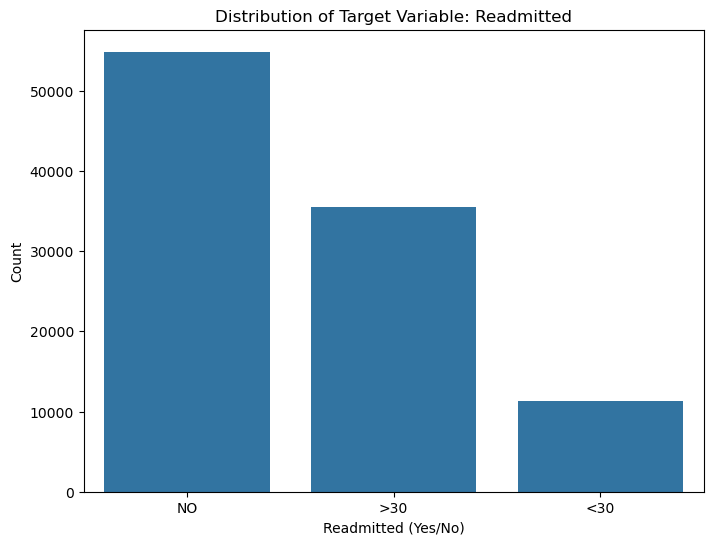

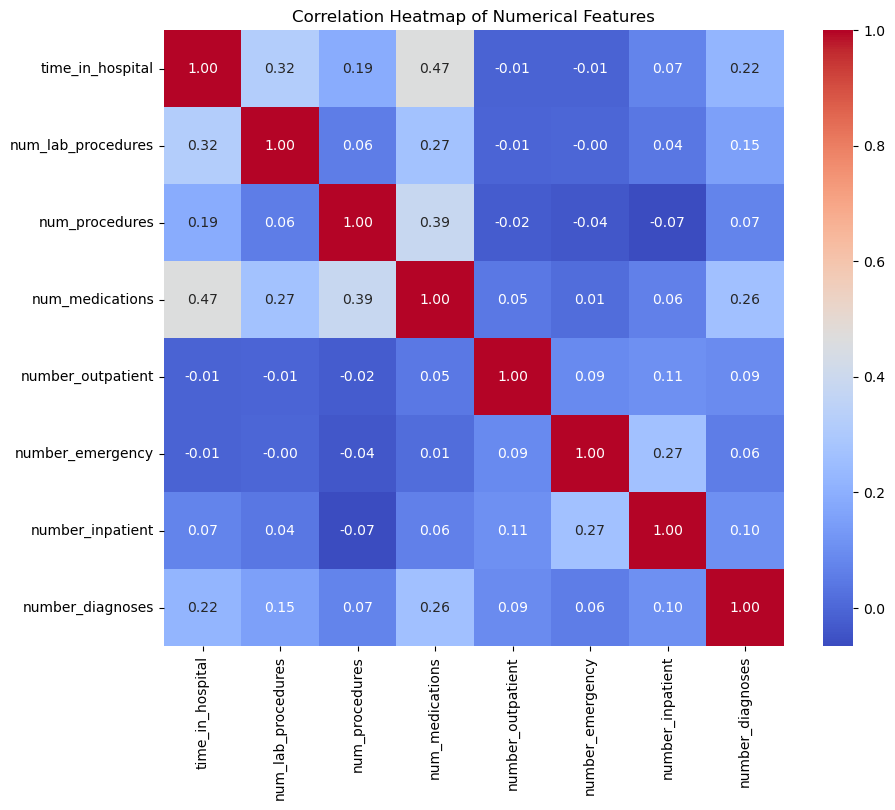

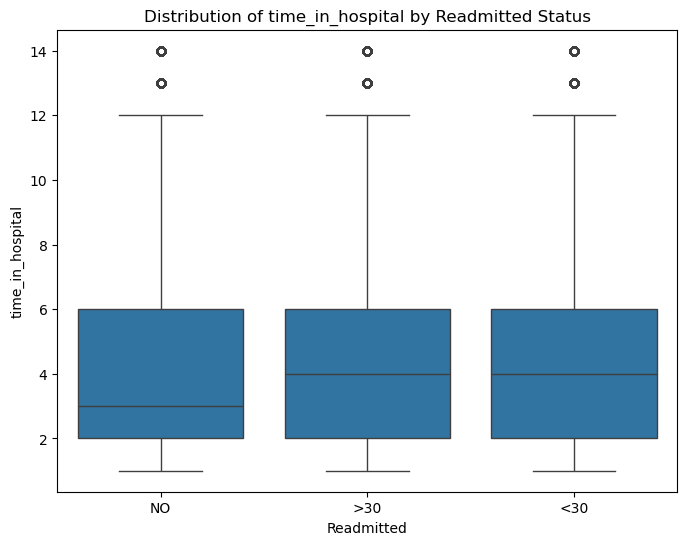

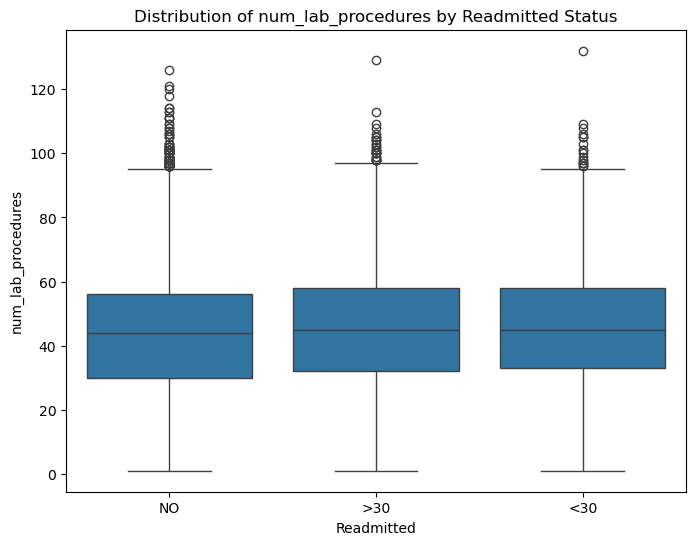

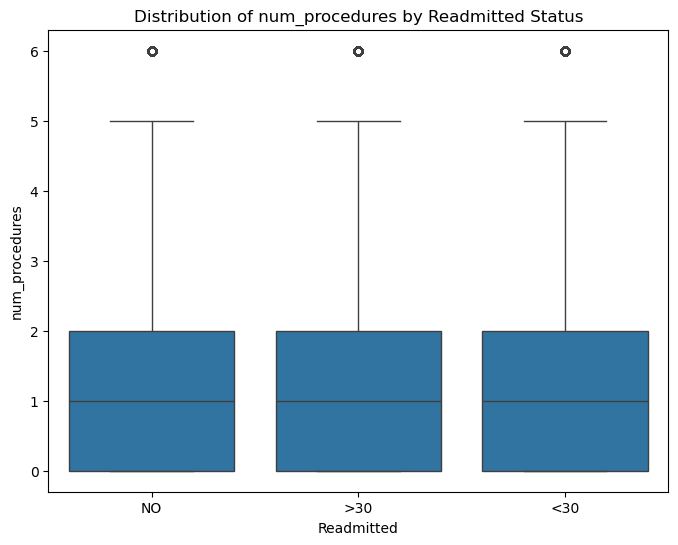

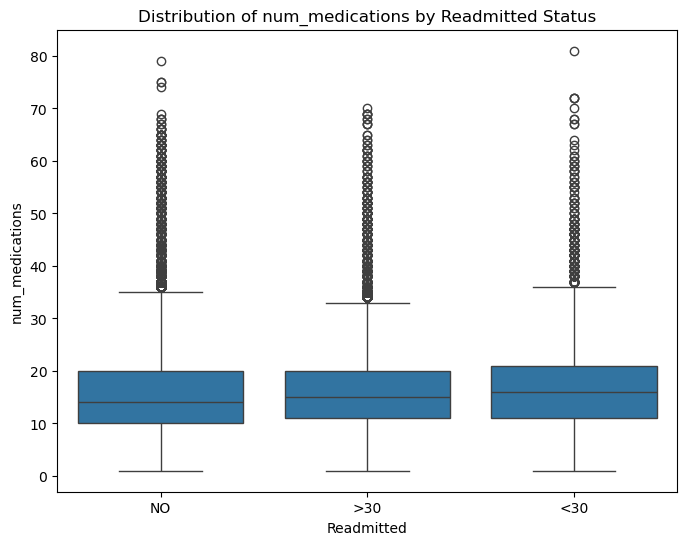

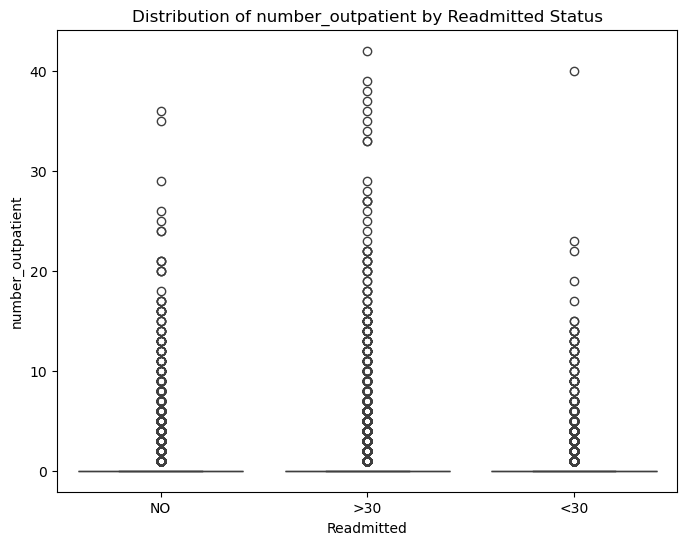

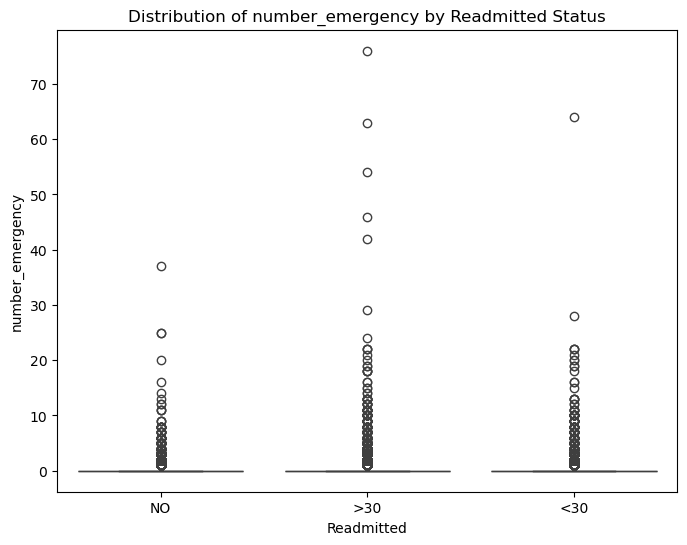

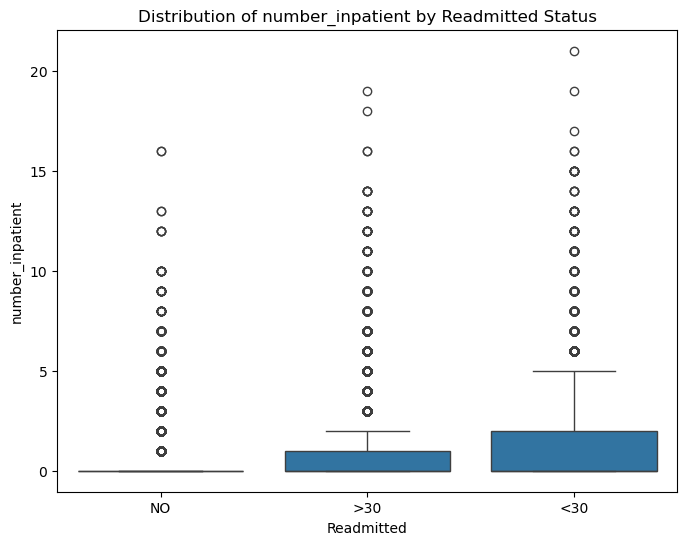

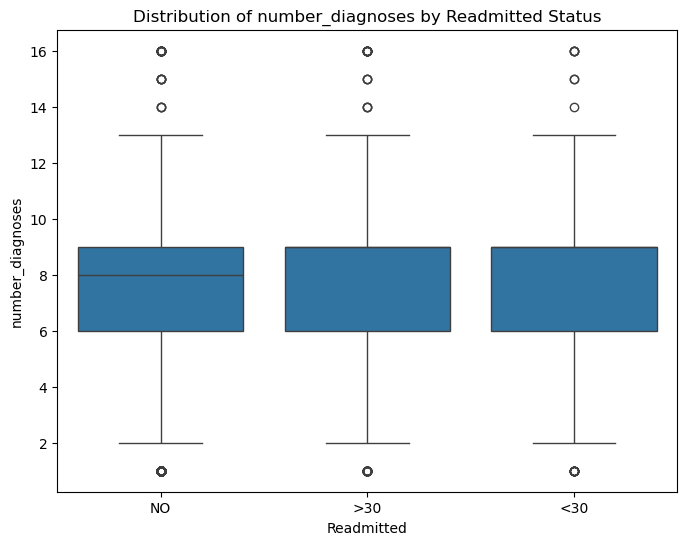

{'General Statistics':         encounter_id   patient_nbr       race  gender      age  weight  \
count   1.017660e+05  1.017660e+05     101766  101766   101766  101766   
unique           NaN           NaN          6       3       10      10   
top              NaN           NaN  Caucasian  Female  [70-80)       ?   
freq             NaN           NaN      76099   54708    26068   98569   
mean    1.652016e+08  5.433040e+07        NaN     NaN      NaN     NaN   
std     1.026403e+08  3.869636e+07        NaN     NaN      NaN     NaN   
min     1.252200e+04  1.350000e+02        NaN     NaN      NaN     NaN   
25%     8.496119e+07  2.341322e+07        NaN     NaN      NaN     NaN   
50%     1.523890e+08  4.550514e+07        NaN     NaN      NaN     NaN   
75%     2.302709e+08  8.754595e+07        NaN     NaN      NaN     NaN   
max     4.438672e+08  1.895026e+08        NaN     NaN      NaN     NaN   

        admission_type_id  discharge_disposition_id  admission_source_id  \
count       

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
data=df
# General statistics
general_stats = data.describe(include='all')

# Target variable distribution
target_distribution = data['readmitted'].value_counts()

# Distribution of numerical features
numerical_features = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]

# Pairwise correlations between numerical features
numerical_correlations = data[numerical_features].corr()

# Summary of unique values in categorical features
categorical_features = data.select_dtypes(include=['object']).columns
categorical_summary = {feature: data[feature].value_counts() for feature in categorical_features}

# Plotting
# Target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='readmitted')
plt.title('Distribution of Target Variable: Readmitted')
plt.ylabel('Count')
plt.xlabel('Readmitted (Yes/No)')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_correlations, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Boxplots for numerical features grouped by target
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x='readmitted', y=feature)
    plt.title(f'Distribution of {feature} by Readmitted Status')
    plt.xlabel('Readmitted')
    plt.ylabel(feature)
    plt.show()

# Displaying EDA results
eda_results = {
    "General Statistics": general_stats,
    "Target Distribution": target_distribution,
    "Categorical Summary": categorical_summary
}

print(eda_results)

## Data Cleaning and PreProcessing. 

### Chi-Square and ANOVA

In [12]:
import pandas as pd
from scipy.stats import chi2_contingency, f_oneway

file_path = 'diabetic_data.csv' 
data = pd.read_csv(file_path)

# Columns to analyze
columns = [
    'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id',
    'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
    'num_procedures', 'num_medications', 'number_outpatient',
    'number_emergency', 'number_inpatient', 'diag_1', 'number_diagnoses',
    'max_glu_serum', 'A1Cresult', 'insulin', 'change', 'diabetesMed', 'readmitted'
]

data = data[columns]

# Target variable
target = 'readmitted'
data[target] = data[target].astype('category')

# Categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Results dictionary
test_results = {}

# Significance threshold
alpha = 0.05

# 1. Chi-Square Test for Categorical Columns
for col in categorical_columns:
    if col != target:
        contingency_table = pd.crosstab(data[col], data[target])
        chi2, p, dof, _ = chi2_contingency(contingency_table)
        significant = 'Yes' if p < alpha else 'No'
        test_results[col] = {
            'Test': 'Chi-Square',
            'Statistic': chi2,
            'p-value': p,
            'Significant': significant
        }

# 2. ANOVA for Numerical Columns
for col in numerical_columns:
    if col != target:
        groups = [data[data[target] == category][col] for category in data[target].unique()]
        f_stat, p = f_oneway(*groups)
        significant = 'Yes' if p < alpha else 'No'
        test_results[col] = {
            'Test': 'ANOVA',
            'Statistic': f_stat,
            'p-value': p,
            'Significant': significant
        }

# Display results
print(f"{'Column':<25} {'Test':<15} {'Statistic':<15} {'p-value':<15} {'Significant':<15}")
print("=" * 90)
for col, result in test_results.items():
    print(f"{col:<25} {result['Test']:<15} {result['Statistic']:<15.4f} {result['p-value']:<15.4f} {result['Significant']:<15}")



Column                    Test            Statistic       p-value         Significant    
race                      Chi-Square      282.5948        0.0000          Yes            
gender                    Chi-Square      37.4612         0.0000          Yes            
age                       Chi-Square      313.1718        0.0000          Yes            
diag_1                    Chi-Square      4970.8160       0.0000          Yes            
max_glu_serum             Chi-Square      35.1101         0.0000          Yes            
A1Cresult                 Chi-Square      16.7850         0.0021          Yes            
insulin                   Chi-Square      516.6958        0.0000          Yes            
change                    Chi-Square      215.8250        0.0000          Yes            
diabetesMed               Chi-Square      386.5109        0.0000          Yes            
admission_type_id         ANOVA           6.9208          0.0010          Yes            
discharge_

## Encoding the Columns

In [14]:
# Corrected list of columns
selected_columns = [
    'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id',
    'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
    'num_procedures', 'num_medications', 'number_outpatient',
    'number_emergency', 'number_inpatient', 'diag_1', 'number_diagnoses',
    'max_glu_serum', 'A1Cresult', 'insulin', 'change', 'diabetesMed','readmitted',
]

# Filter the dataset to only include the selected columns
filtered_data = data[selected_columns]

# Fill NaN or null values with the mode of each column
filtered_data = filtered_data.apply(lambda col: col.fillna(col.mode()[0]))

# Identifying categorical columns for encoding
categorical_columns = ['race', 'age', 'insulin', 'diabetesMed', 'readmitted','gender','A1Cresult','max_glu_serum','change','diag_1']

# Applying LabelEncoder to categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    filtered_data[col] = le.fit_transform(filtered_data[col])
    label_encoders[col] = le

In [16]:
filtered_data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,number_emergency,number_inpatient,diag_1,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
0,3,0,0,6,25,1,1,41,0,1,...,0,0,124,1,2,1,1,1,0,2
1,3,0,1,1,1,7,3,59,0,18,...,0,0,143,9,2,1,3,0,1,1
2,1,0,2,1,1,7,2,11,5,13,...,0,1,454,6,2,1,1,1,1,2
3,3,1,3,1,1,7,2,44,1,16,...,0,0,554,7,2,1,3,0,1,2
4,3,1,4,1,1,7,1,51,0,8,...,0,0,54,5,2,1,2,0,1,2


In [18]:
filtered_data.to_csv("filtered_data.csv",index=False)


In [20]:
filtered_data = filtered_data.dropna(axis=1)
filtered_data = filtered_data[~filtered_data['readmitted'].isin([1])]

In [21]:
filtered_data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,number_emergency,number_inpatient,diag_1,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
0,3,0,0,6,25,1,1,41,0,1,...,0,0,124,1,2,1,1,1,0,2
2,1,0,2,1,1,7,2,11,5,13,...,0,1,454,6,2,1,1,1,1,2
3,3,1,3,1,1,7,2,44,1,16,...,0,0,554,7,2,1,3,0,1,2
4,3,1,4,1,1,7,1,51,0,8,...,0,0,54,5,2,1,2,0,1,2
6,3,1,6,3,1,2,4,70,1,21,...,0,0,263,7,2,1,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101759,3,1,8,1,1,7,1,1,0,15,...,0,0,283,7,2,1,3,0,1,2
101762,1,0,8,1,4,5,5,33,3,18,...,0,1,381,9,2,1,2,1,1,2
101763,3,1,7,1,1,7,1,53,0,9,...,0,0,236,13,2,1,0,0,1,2
101764,3,0,8,2,3,7,10,45,2,21,...,0,1,693,9,2,1,3,0,1,2


In [24]:
filtered_data=filtered_data.reset_index(drop=True)

In [25]:
filtered_data['readmitted'].value_counts()


readmitted
2    54864
0    11357
Name: count, dtype: int64

In [31]:

filtered_data['readmitted'] = filtered_data['readmitted'].replace(2, 1)


In [33]:
filtered_data['readmitted'].value_counts()

readmitted
1    54864
0    11357
Name: count, dtype: int64

In [35]:


sampled_data = filtered_data.groupby('readmitted').apply(lambda x: x.sample(n=2500, random_state=42))


sampled_data = sampled_data.reset_index(drop=True)


C:\Users\shaik\AppData\Local\Temp\ipykernel_24604\2874693587.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = filtered_data.groupby('readmitted').apply(lambda x: x.sample(n=2500, random_state=42))


In [37]:
sampled_data['readmitted'].value_counts()

readmitted
0    2500
1    2500
Name: count, dtype: int64

# Standardising the data 

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Separate features and labels
features = sampled_data.drop(columns=['readmitted'])
labels = sampled_data['readmitted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Standardize the training data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Standardize the testing data (use the same scaler fitted on training data)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Combine standardized features with their respective labels
train_data = pd.concat([X_train_scaled, y_train.reset_index(drop=True)], axis=1)
test_data = pd.concat([X_test_scaled, y_test.reset_index(drop=True)], axis=1)

# View the first few rows of the standardized training data
train_data.head()


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,number_emergency,number_inpatient,diag_1,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
0,0.425158,1.069403,-0.051797,2.901128,-0.543480,2.880296,-0.824081,-0.806672,-0.206402,0.691838,...,-0.251096,-0.505036,1.020510,-0.245179,0.14932,-0.040394,-0.469781,0.913708,-1.841407,1
1,0.425158,-0.935101,-0.051797,-0.700744,-0.543480,0.352002,-1.154175,-0.077194,-0.795701,-1.340783,...,-0.251096,-0.505036,1.223066,0.280674,0.14932,-0.040394,-0.469781,0.913708,-1.841407,1
2,-1.734374,-0.935101,-0.666597,-0.700744,-0.543480,0.352002,-0.163892,0.912811,-0.795701,-0.503821,...,-0.251096,-0.505036,1.345828,-1.822737,0.14932,3.397434,0.719537,-1.094442,0.543063,0
3,0.425158,1.069403,-0.666597,2.901128,3.642838,-1.164975,-1.154175,-0.129300,2.150795,-0.742953,...,-0.251096,-0.505036,-0.440352,-0.245179,0.14932,-0.040394,-0.469781,-1.094442,0.543063,1
4,-1.734374,1.069403,-1.281396,0.019630,-0.543480,-1.164975,-0.824081,-0.389827,-0.795701,-1.340783,...,-0.251096,-0.505036,0.860920,-2.348590,0.14932,-0.040394,0.719537,0.913708,0.543063,1


## SVM

## Linear Kernel 

In [44]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------------
# 1. Separate features/labels
# -------------------------
X_train = train_data.drop(columns=['readmitted'])  # Features from training data
y_train = train_data['readmitted']                # Labels from training data
X_test = test_data.drop(columns=['readmitted'])   # Features from test data
y_test = test_data['readmitted']                  # Labels from test data

# -------------------------
# 2. Initialize the SVM classifier
# -------------------------
svm_model = SVC(
    kernel='linear', 
    C=1, 
    verbose=True, 
    class_weight='balanced'
)

# -------------------------
# 3. 10-Fold Cross-Validation on the training set
# -------------------------
# Define a StratifiedKFold to maintain the same class distribution in each fold.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation scoring on accuracy
cv_scores = cross_val_score(
    svm_model, 
    X_train, 
    y_train, 
    cv=skf, 
    scoring='accuracy'
)

print("=== 10-Fold Cross-Validation Results (Training Set) ===")
print(f"Fold accuracies: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}\n")

# -------------------------
# 4. Train final model on the entire training set
#    (After checking cross-validation performance)
# -------------------------
print("Training the model on the entire training set...")
svm_model.fit(X_train, y_train)

# -------------------------
# 5. Evaluate on the held-out test set
# -------------------------
print("\nEvaluating the model on test data...")
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_pred))

# Summary of performance
report = classification_report(y_test, y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1 = report['weighted avg']['f1-score']

print("\n=== Test Data Performance ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]=== 10-Fold Cross-Validation Results (Training Set) ===
Fold accuracies: [0.585  0.6225 0.6325 0.6225 0.6175 0.6125 0.5925 0.565  0.5925 0.605 ]
Mean accuracy: 0.6047
Standard deviation: 0.0197

Training the model on the entire training set...
[LibSVM]
Evaluating the model on test data...

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.76      0.34      0.47       500
           1       0.57      0.89      0.70       500

    accuracy                           0.61      1000
   macro avg       0.67      0.61      0.58      1000
weighted avg       0.67      0.61      0.58      1000


Confusion Matrix (Test Data):
[[168 332]
 [ 53 447]]

=== Test Data Performance ===
Accuracy: 0.6150
Precision: 0.6670
Recall: 0.6150
F1-Score: 0.5825


## Multi-nomial 

### Polynomial with degree 3

In [48]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------------
# 1. Separate features/labels
# -------------------------
X_train = train_data.drop(columns=['readmitted'])  # Features from training data
y_train = train_data['readmitted']                # Labels from training data
X_test = test_data.drop(columns=['readmitted'])   # Features from test data
y_test = test_data['readmitted']                  # Labels from test data

# -------------------------
# 2. Initialize the SVM classifier
# -------------------------
svm_model = SVC(
    kernel='poly', 
    degree=3,
    C=1,
    gamma='scale',
    verbose=True, 
    class_weight='balanced'
)

# -------------------------
# 3. 10-Fold Cross-Validation on the training set
# -------------------------
# Define a StratifiedKFold to maintain the same class distribution in each fold.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation scoring on accuracy
cv_scores = cross_val_score(
    svm_model, 
    X_train, 
    y_train, 
    cv=skf, 
    scoring='accuracy'
)

print("=== 10-Fold Cross-Validation Results (Training Set) ===")
print(f"Fold accuracies: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}\n")

# -------------------------
# 4. Train final model on the entire training set
#    (After checking cross-validation performance)
# -------------------------
print("Training the model on the entire training set...")
svm_model.fit(X_train, y_train)

# -------------------------
# 5. Evaluate on the held-out test set
# -------------------------
print("\nEvaluating the model on test data...")
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_pred))

# Summary of performance
report = classification_report(y_test, y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1 = report['weighted avg']['f1-score']

print("\n=== Test Data Performance ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]=== 10-Fold Cross-Validation Results (Training Set) ===
Fold accuracies: [0.5675 0.6225 0.6125 0.605  0.625  0.595  0.5975 0.56   0.555  0.61  ]
Mean accuracy: 0.5950
Standard deviation: 0.0242

Training the model on the entire training set...
[LibSVM]
Evaluating the model on test data...

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.63      0.52      0.57       500
           1       0.59      0.69      0.64       500

    accuracy                           0.61      1000
   macro avg       0.61      0.61      0.60      1000
weighted avg       0.61      0.61      0.60      1000


Confusion Matrix (Test Data):
[[262 238]
 [156 344]]

=== Test Data Performance ===
Accuracy: 0.6060
Precision: 0.6089
Recall: 0.6060
F1-Score: 0.6033


### Polynomial with degree 5

In [51]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------------
# 1. Separate features/labels
# -------------------------
X_train = train_data.drop(columns=['readmitted'])  # Features from training data
y_train = train_data['readmitted']                # Labels from training data
X_test = test_data.drop(columns=['readmitted'])   # Features from test data
y_test = test_data['readmitted']                  # Labels from test data

# -------------------------
# 2. Initialize the SVM classifier
# -------------------------
svm_model = SVC(
    kernel='poly', 
    degree=5,
    C=1,
    gamma='scale',
    verbose=True, 
    class_weight='balanced'
)

# -------------------------
# 3. 10-Fold Cross-Validation on the training set
# -------------------------
# Define a StratifiedKFold to maintain the same class distribution in each fold.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation scoring on accuracy
cv_scores = cross_val_score(
    svm_model, 
    X_train, 
    y_train, 
    cv=skf, 
    scoring='accuracy'
)

print("=== 10-Fold Cross-Validation Results (Training Set) ===")
print(f"Fold accuracies: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}\n")

# -------------------------
# 4. Train final model on the entire training set
#    (After checking cross-validation performance)
# -------------------------
print("Training the model on the entire training set...")
svm_model.fit(X_train, y_train)

# -------------------------
# 5. Evaluate on the held-out test set
# -------------------------
print("\nEvaluating the model on test data...")
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_pred))

# Summary of performance
report = classification_report(y_test, y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1 = report['weighted avg']['f1-score']

print("\n=== Test Data Performance ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]=== 10-Fold Cross-Validation Results (Training Set) ===
Fold accuracies: [0.5925 0.62   0.5675 0.6275 0.5725 0.575  0.5925 0.5225 0.55   0.5925]
Mean accuracy: 0.5813
Standard deviation: 0.0296

Training the model on the entire training set...
[LibSVM]
Evaluating the model on test data...

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.65      0.39      0.49       500
           1       0.56      0.80      0.66       500

    accuracy                           0.59      1000
   macro avg       0.61      0.59      0.57      1000
weighted avg       0.61      0.59      0.57      1000


Confusion Matrix (Test Data):
[[193 307]
 [102 398]]

=== Test Data Performance ===
Accuracy: 0.5910
Precision: 0.6094
Recall: 0.5910
F1-Score: 0.5731


### RBF Kernel

In [54]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np

# -------------------------
# 1. Separate features/labels
# -------------------------
X_train = train_data.drop(columns=['readmitted'])  # Features from training data
y_train = train_data['readmitted']                # Labels from training data
X_test = test_data.drop(columns=['readmitted'])   # Features from test data
y_test = test_data['readmitted']                  # Labels from test data

# -------------------------
# 2. Initialize the SVM classifier with RBF kernel
# -------------------------
svm_model = SVC(
    kernel='rbf', 
    C=1, 
    gamma='scale', 
    verbose=True, 
    class_weight='balanced'
)

# -------------------------
# 3. 10-Fold Cross-Validation on the training set
# -------------------------
# Define a StratifiedKFold to maintain the same class distribution in each fold.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation scoring on accuracy
cv_scores = cross_val_score(
    svm_model, 
    X_train, 
    y_train, 
    cv=skf, 
    scoring='accuracy'
)

print("=== 10-Fold Cross-Validation Results (Training Set) ===")
print(f"Fold accuracies: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}\n")

# -------------------------
# 4. Train final model on the entire training set
#    (After checking cross-validation performance)
# -------------------------
print("Training the model on the entire training set...")
svm_model.fit(X_train, y_train)

# -------------------------
# 5. Evaluate on the held-out test set
# -------------------------
print("\nEvaluating the model on test data...")
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_pred))

# Summary of performance
report = classification_report(y_test, y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1 = report['weighted avg']['f1-score']

print("\n=== Test Data Performance ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]=== 10-Fold Cross-Validation Results (Training Set) ===
Fold accuracies: [0.5925 0.63   0.63   0.6275 0.6475 0.64   0.62   0.5725 0.57   0.6325]
Mean accuracy: 0.6163
Standard deviation: 0.0263

Training the model on the entire training set...
[LibSVM]
Evaluating the model on test data...

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.66      0.57      0.61       500
           1       0.62      0.70      0.66       500

    accuracy                           0.64      1000
   macro avg       0.64      0.64      0.64      1000
weighted avg       0.64      0.64      0.64      1000


Confusion Matrix (Test Data):
[[287 213]
 [148 352]]

=== Test Data Performance ===
Accuracy: 0.6390
Precision: 0.6414
Recall: 0.6390
F1-Score: 0.6375


## Sigmoid

In [57]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------------
# 1. Separate features/labels
# -------------------------
X_train = train_data.drop(columns=['readmitted'])  # Features from training data
y_train = train_data['readmitted']                # Labels from training data
X_test = test_data.drop(columns=['readmitted'])   # Features from test data
y_test = test_data['readmitted']                  # Labels from test data

# -------------------------
# 2. Initialize the SVM classifier
# -------------------------
svm_model = SVC(
    kernel='sigmoid', 
    C=1, 
    verbose=True, 
    class_weight='balanced'
)

# -------------------------
# 3. 10-Fold Cross-Validation on the training set
# -------------------------
# Define a StratifiedKFold to maintain the same class distribution in each fold.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation scoring on accuracy
cv_scores = cross_val_score(
    svm_model, 
    X_train, 
    y_train, 
    cv=skf, 
    scoring='accuracy'
)

print("=== 10-Fold Cross-Validation Results (Training Set) ===")
print(f"Fold accuracies: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}\n")

# -------------------------
# 4. Train final model on the entire training set
#    (After checking cross-validation performance)
# -------------------------
print("Training the model on the entire training set...")
svm_model.fit(X_train, y_train)

# -------------------------
# 5. Evaluate on the held-out test set
# -------------------------
print("\nEvaluating the model on test data...")
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_pred))

# Summary of performance
report = classification_report(y_test, y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1 = report['weighted avg']['f1-score']

print("\n=== Test Data Performance ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]=== 10-Fold Cross-Validation Results (Training Set) ===
Fold accuracies: [0.5475 0.5725 0.6025 0.5825 0.6175 0.6075 0.555  0.5675 0.5775 0.56  ]
Mean accuracy: 0.5790
Standard deviation: 0.0223

Training the model on the entire training set...
[LibSVM]
Evaluating the model on test data...

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.55      0.53      0.54       500
           1       0.54      0.56      0.55       500

    accuracy                           0.54      1000
   macro avg       0.54      0.54      0.54      1000
weighted avg       0.54      0.54      0.54      1000


Confusion Matrix (Test Data):
[[263 237]
 [219 281]]

=== Test Data Performance ===
Accuracy: 0.5440
Precision: 0.5441
Recall: 0.5440
F1-Score: 0.5439


## Random Forest 

In [64]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, 
                             recall_score, f1_score, classification_report, 
                             confusion_matrix)

# ------------------------------------------------------------------------------
# 1. Prepare Data
# ------------------------------------------------------------------------------
X_train = train_data.drop(columns=['readmitted']).values  # Features
y_train = train_data['readmitted'].values                 # Labels

X_test = test_data.drop(columns=['readmitted']).values    # Features
y_test = test_data['readmitted'].values                   # Labels

# ------------------------------------------------------------------------------
# 2. 10-Fold Cross-Validation
# ------------------------------------------------------------------------------
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lists to hold metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1s = []

# ------------------------------------------------------------------------------
# 3. Cross-Validation Loop
# ------------------------------------------------------------------------------
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
    print(f"\n=== Fold {fold + 1} ===")
    
    # Split into training and validation 
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
    
    # Initialize Random Forest model for each fold
    rf_model = RandomForestClassifier(
        n_estimators=200,            # Number of trees in the forest
        random_state=42,             # For reproducibility
        class_weight='balanced',     # Handle class imbalance
        max_depth=15,                # Maximum depth of the trees
        min_samples_split=5,         # Minimum samples required to split an internal node
        min_samples_leaf=2,          # Minimum samples required at a leaf node
        max_features='sqrt',         # Number of features to consider when looking for the best split
        bootstrap=True,              # Use bootstrap samples to train each tree
        n_jobs=-1,                   # Use all available processors for parallelization
        criterion='gini',            # Measure quality of split using Gini Index
        oob_score=True               # Calculate Out-Of-Bag score for validation
    )
    
    # Train the model on the fold's training data
    rf_model.fit(X_train_fold, y_train_fold)
    
    # Predict on the validation data
    y_val_pred = rf_model.predict(X_val_fold)
    
    # Compute metrics
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    precision = precision_score(y_val_fold, y_val_pred, average='weighted', zero_division=0)
    recall = recall_score(y_val_fold, y_val_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_val_fold, y_val_pred, average='weighted', zero_division=0)
    
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1s.append(f1)
    
    # Print fold-specific metrics
    print(f"Fold {fold + 1} Accuracy:  {accuracy:.4f}")
    print(f"Fold {fold + 1} Precision: {precision:.4f}")
    print(f"Fold {fold + 1} Recall:    {recall:.4f}")
    print(f"Fold {fold + 1} F1 Score:  {f1:.4f}")

# ------------------------------------------------------------------------------
# 4. Report Cross-Validation Performance
# ------------------------------------------------------------------------------
print("\n=== 10-Fold Cross-Validation Summary ===")
print(f"Mean Accuracy:   {np.mean(fold_accuracies):.4f} ± {np.std(fold_accuracies):.4f}")
print(f"Mean Precision:  {np.mean(fold_precisions):.4f}")
print(f"Mean Recall:     {np.mean(fold_recalls):.4f}")
print(f"Mean F1 Score:   {np.mean(fold_f1s):.4f}")

# ------------------------------------------------------------------------------
# 5. Train Final Model on Entire Training Data
# ------------------------------------------------------------------------------
print("\nTraining final Random Forest model on the entire training set...")
final_rf_model = RandomForestClassifier(
    n_estimators=200,            # Number of trees in the forest
    random_state=42,             # For reproducibility
    class_weight='balanced',     # Handle class imbalance
    max_depth=15,                # Maximum depth of the trees
    min_samples_split=5,         # Minimum samples required to split an internal node
    min_samples_leaf=2,          # Minimum samples required at a leaf node
    max_features='sqrt',         # Number of features to consider when looking for the best split
    bootstrap=True,              # Use bootstrap samples to train each tree
    n_jobs=-1,                   # Use all available processors for parallelization
    criterion='gini',            # Measure quality of split using Gini Index
    oob_score=True               # Calculate Out-Of-Bag score for validation
)
final_rf_model.fit(X_train, y_train)

# ------------------------------------------------------------------------------
# 6. Evaluate Final Model on Test Set
# ------------------------------------------------------------------------------
y_test_pred = final_rf_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

print("\n=== Test Set Performance ===")
print(f"Test Accuracy:   {test_accuracy:.4f}")
print(f"Test Precision:  {test_precision:.4f}")
print(f"Test Recall:     {test_recall:.4f}")
print(f"Test F1 Score:   {test_f1:.4f}")

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=0))

print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


=== Fold 1 ===
Fold 1 Accuracy:  0.6300
Fold 1 Precision: 0.6339
Fold 1 Recall:    0.6300
Fold 1 F1 Score:  0.6273

=== Fold 2 ===
Fold 2 Accuracy:  0.6675
Fold 2 Precision: 0.6690
Fold 2 Recall:    0.6675
Fold 2 F1 Score:  0.6667

=== Fold 3 ===
Fold 3 Accuracy:  0.6575
Fold 3 Precision: 0.6577
Fold 3 Recall:    0.6575
Fold 3 F1 Score:  0.6574

=== Fold 4 ===
Fold 4 Accuracy:  0.6475
Fold 4 Precision: 0.6479
Fold 4 Recall:    0.6475
Fold 4 F1 Score:  0.6472

=== Fold 5 ===
Fold 5 Accuracy:  0.6625
Fold 5 Precision: 0.6632
Fold 5 Recall:    0.6625
Fold 5 F1 Score:  0.6621

=== Fold 6 ===
Fold 6 Accuracy:  0.6400
Fold 6 Precision: 0.6407
Fold 6 Recall:    0.6400
Fold 6 F1 Score:  0.6396

=== Fold 7 ===
Fold 7 Accuracy:  0.6425
Fold 7 Precision: 0.6425
Fold 7 Recall:    0.6425
Fold 7 F1 Score:  0.6425

=== Fold 8 ===
Fold 8 Accuracy:  0.6025
Fold 8 Precision: 0.6041
Fold 8 Recall:    0.6025
Fold 8 F1 Score:  0.6009

=== Fold 9 ===
Fold 9 Accuracy:  0.6100
Fold 9 Precision: 0.6107
Fold 9

# Neural Network

### Binary cross Entropy

In [68]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# -------------------------
# Prepare the data
# -------------------------
X_train = train_data.drop(columns=['readmitted']).values  # Features from training data
y_train = train_data['readmitted'].values                 # Labels from training data
X_test = test_data.drop(columns=['readmitted']).values    # Features from test data
y_test = test_data['readmitted'].values                   # Labels from test data

# Compute class weights
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = {i: class_weights_array[i] for i in range(len(class_weights_array))}
print("Computed Class Weights:", class_weights)

# -------------------------
# Define the model architecture
# -------------------------
def create_model():
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

# -------------------------
# Perform 10-Fold Cross-Validation
# -------------------------
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1s = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
    print(f"\n=== Fold {fold + 1} ===")
    
    # Split data into train and validation sets for the current fold
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
    
    # Create a new instance of the model
    model = create_model()
    
    # Train the model
    history = model.fit(X_train_fold, y_train_fold, 
                        validation_data=(X_val_fold, y_val_fold),
                        epochs=20, 
                        batch_size=64, 
                        verbose=1, 
                        class_weight=class_weights)
    
    # Evaluate on the validation set
    val_loss, val_acc = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f"Validation Accuracy for Fold {fold + 1}: {val_acc:.4f}")
    
    # Predict and calculate metrics for the validation set
    y_val_pred_prob = model.predict(X_val_fold)
    y_val_pred = (y_val_pred_prob > 0.5).astype(int)
    
    report = classification_report(y_val_fold, y_val_pred, output_dict=True)
    fold_accuracies.append(val_acc)
    fold_precisions.append(report['weighted avg']['precision'])
    fold_recalls.append(report['weighted avg']['recall'])
    fold_f1s.append(report['weighted avg']['f1-score'])

# -------------------------
# Report Cross-Validation Results
# -------------------------
print("\n=== 10-Fold Cross-Validation Results ===")
print(f"Mean Accuracy: {np.mean(fold_accuracies):.4f} ± {np.std(fold_accuracies):.4f}")
print(f"Mean Precision: {np.mean(fold_precisions):.4f}")
print(f"Mean Recall: {np.mean(fold_recalls):.4f}")
print(f"Mean F1-Score: {np.mean(fold_f1s):.4f}")

# -------------------------
# Final Model Training and Testing
# -------------------------
print("\nTraining final model on entire training set...")
final_model = create_model()
final_model.fit(X_train, y_train, 
                validation_split=0.1, 
                epochs=20, 
                batch_size=64, 
                verbose=1, 
                class_weight=class_weights)

# Evaluate the model on the test set
test_loss, test_acc = final_model.evaluate(X_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")

# Predict on the test set
y_test_pred_prob = final_model.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

# Evaluate performance metrics on the test set
print("\nFinal Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

print("\nFinal Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred))

Computed Class Weights: {0: 1.0, 1: 1.0}

=== Fold 1 ===
Epoch 1/20


C:\Users\shaik\Desktop\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5003 - loss: 0.8606 - val_accuracy: 0.4925 - val_loss: 0.6992
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5322 - loss: 0.7370 - val_accuracy: 0.5025 - val_loss: 0.7063
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5398 - loss: 0.7063 - val_accuracy: 0.5100 - val_loss: 0.7063
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5661 - loss: 0.6865 - val_accuracy: 0.5225 - val_loss: 0.7007
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5393 - loss: 0.6858 - val_accuracy: 0.5250 - val_loss: 0.6871
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5460 - loss: 0.6908 - val_accuracy: 0.5250 - val_loss: 0.6798
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5767 - loss: 0.6669 - val_accuracy: 0.5525 - val_loss: 0.6694
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5754 - loss: 0.6691 - val_accuracy: 0.5925 - val_loss: 0.6621
Epo

C:\Users\shaik\Desktop\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4955 - loss: 0.9163 - val_accuracy: 0.5875 - val_loss: 0.6812
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5270 - loss: 0.7758 - val_accuracy: 0.5700 - val_loss: 0.6741
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5652 - loss: 0.7157 - val_accuracy: 0.5650 - val_loss: 0.6697
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5564 - loss: 0.7088 - val_accuracy: 0.5950 - val_loss: 0.6662
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5640 - loss: 0.6928 - val_accuracy: 0.5950 - val_loss: 0.6643
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5833 - loss: 0.6738 - val_accuracy: 0.6000 - val_loss: 0.6632
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5583 - loss: 0.6781 - val_accuracy: 0.5775 - val_loss: 0.6624
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6015 - loss: 0.6694 - val_accuracy: 0.5875 - val_loss: 0.6614
Epo

C:\Users\shaik\Desktop\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4992 - loss: 0.8543 - val_accuracy: 0.5475 - val_loss: 0.6848
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5243 - loss: 0.7316 - val_accuracy: 0.5650 - val_loss: 0.6804
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5624 - loss: 0.7032 - val_accuracy: 0.5825 - val_loss: 0.6722
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5572 - loss: 0.6906 - val_accuracy: 0.5800 - val_loss: 0.6658
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5524 - loss: 0.6923 - val_accuracy: 0.5900 - val_loss: 0.6575
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5568 - loss: 0.6921 - val_accuracy: 0.5950 - val_loss: 0.6531
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5831 - loss: 0.6731 - val_accuracy: 0.5950 - val_loss: 0.6493
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5859 - loss: 0.6686 - val_accuracy: 0.5950 - val_loss

C:\Users\shaik\Desktop\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5076 - loss: 0.8796 - val_accuracy: 0.5875 - val_loss: 0.6695
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5419 - loss: 0.7320 - val_accuracy: 0.6000 - val_loss: 0.6581
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5293 - loss: 0.7294 - val_accuracy: 0.6225 - val_loss: 0.6524
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5537 - loss: 0.7124 - val_accuracy: 0.6400 - val_loss: 0.6451
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5362 - loss: 0.7058 - val_accuracy: 0.6525 - val_loss: 0.6409
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5661 - loss: 0.6919 - val_accuracy: 0.6250 - val_loss: 0.6388
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5486 - loss: 0.6890 - val_accuracy: 0.6300 - val_loss: 0.6389
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5871 - loss: 0.6631 - val_accuracy: 0.6200 - val_loss: 0.6400
Epo

C:\Users\shaik\Desktop\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4929 - loss: 0.8341 - val_accuracy: 0.5600 - val_loss: 0.6792
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5521 - loss: 0.7231 - val_accuracy: 0.5700 - val_loss: 0.6714
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5519 - loss: 0.7146 - val_accuracy: 0.5900 - val_loss: 0.6655
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5589 - loss: 0.6897 - val_accuracy: 0.5700 - val_loss: 0.6574
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6040 - loss: 0.6652 - val_accuracy: 0.5725 - val_loss: 0.6529
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5741 - loss: 0.6749 - val_accuracy: 0.5800 - val_loss: 0.6526
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5733 - loss: 0.6794 - val_accuracy: 0.5725 - val_loss: 0.6517
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6002 - loss: 0.6589 - val_accuracy: 0.5725 - val_loss: 0.6495
Epo

C:\Users\shaik\Desktop\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5306 - loss: 0.7712 - val_accuracy: 0.5200 - val_loss: 0.6824
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5481 - loss: 0.7093 - val_accuracy: 0.5475 - val_loss: 0.6690
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5398 - loss: 0.7060 - val_accuracy: 0.5775 - val_loss: 0.6624
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5684 - loss: 0.6771 - val_accuracy: 0.5725 - val_loss: 0.6542
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5750 - loss: 0.6696 - val_accuracy: 0.5875 - val_loss: 0.6499
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5700 - loss: 0.6731 - val_accuracy: 0.5950 - val_loss: 0.6471
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5933 - loss: 0.6638 - val_accuracy: 0.6125 - val_loss: 0.6472
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5959 - loss: 0.6531 - val_accuracy: 0.6075 - val_loss: 0.6457
Epo

C:\Users\shaik\Desktop\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5182 - loss: 0.7958 - val_accuracy: 0.5650 - val_loss: 0.6780
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5317 - loss: 0.7243 - val_accuracy: 0.5850 - val_loss: 0.6689
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5409 - loss: 0.6983 - val_accuracy: 0.5750 - val_loss: 0.6653
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5848 - loss: 0.6808 - val_accuracy: 0.5925 - val_loss: 0.6601
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5895 - loss: 0.6705 - val_accuracy: 0.6150 - val_loss: 0.6538
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5875 - loss: 0.6735 - val_accuracy: 0.6250 - val_loss: 0.6548
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5819 - loss: 0.6755 - val_accuracy: 0.6225 - val_loss: 0.6518
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6037 - loss: 0.6628 - val_accuracy: 0.6325 - val_loss: 0.6496
Epo

C:\Users\shaik\Desktop\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5167 - loss: 0.8454 - val_accuracy: 0.5550 - val_loss: 0.6860
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5537 - loss: 0.7417 - val_accuracy: 0.5700 - val_loss: 0.6810
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5560 - loss: 0.7076 - val_accuracy: 0.5625 - val_loss: 0.6814
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5640 - loss: 0.6909 - val_accuracy: 0.5750 - val_loss: 0.6777
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5799 - loss: 0.6794 - val_accuracy: 0.5650 - val_loss: 0.6769
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5803 - loss: 0.6781 - val_accuracy: 0.5825 - val_loss: 0.6726
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5764 - loss: 0.6793 - val_accuracy: 0.5900 - val_loss: 0.6691
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5918 - loss: 0.6647 - val_accuracy: 0.5875 - val_loss: 0.6678
Epo

C:\Users\shaik\Desktop\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5237 - loss: 0.7761 - val_accuracy: 0.5775 - val_loss: 0.6845
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5474 - loss: 0.7123 - val_accuracy: 0.5975 - val_loss: 0.6702
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5577 - loss: 0.6871 - val_accuracy: 0.5975 - val_loss: 0.6650
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5674 - loss: 0.6843 - val_accuracy: 0.5900 - val_loss: 0.6609
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5639 - loss: 0.6796 - val_accuracy: 0.5950 - val_loss: 0.6569
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5899 - loss: 0.6577 - val_accuracy: 0.5975 - val_loss: 0.6583
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5938 - loss: 0.6687 - val_accuracy: 0.6075 - val_loss: 0.6572
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6032 - loss: 0.6693 - val_accuracy: 0.5950 - val_loss: 0.6564
Epo

C:\Users\shaik\Desktop\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4969 - loss: 0.8677 - val_accuracy: 0.5300 - val_loss: 0.6894
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5367 - loss: 0.7655 - val_accuracy: 0.5450 - val_loss: 0.6817
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5587 - loss: 0.7111 - val_accuracy: 0.5800 - val_loss: 0.6728
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5813 - loss: 0.6872 - val_accuracy: 0.5425 - val_loss: 0.6659
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5723 - loss: 0.6985 - val_accuracy: 0.5775 - val_loss: 0.6612
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5849 - loss: 0.6816 - val_accuracy: 0.5650 - val_loss: 0.6587
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5677 - loss: 0.6831 - val_accuracy: 0.5700 - val_loss: 0.6568
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5820 - loss: 0.6728 - val_accuracy: 0.5750 - val_loss: 0.6590
Epo

C:\Users\shaik\Desktop\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5141 - loss: 0.8081 - val_accuracy: 0.5100 - val_loss: 0.6932
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5291 - loss: 0.7253 - val_accuracy: 0.5050 - val_loss: 0.6979
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5466 - loss: 0.7041 - val_accuracy: 0.5275 - val_loss: 0.6893
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5502 - loss: 0.6973 - val_accuracy: 0.5650 - val_loss: 0.6804
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5694 - loss: 0.6847 - val_accuracy: 0.5725 - val_loss: 0.6722
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5729 - loss: 0.6780 - val_accuracy: 0.5800 - val_loss: 0.6611
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5914 - loss: 0.6735 - val_accuracy: 0.5850 - val_loss: 0.6543
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5668 - loss: 0.6803 - val_accuracy: 0.5925 - val_loss: 0.6467
Epo

### Categorical cross Entropy

In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

# -------------------------
# Prepare the data
# -------------------------
X_train = train_data.drop(columns=['readmitted']).values  # Features from training data
y_train = train_data['readmitted'].values                 # Labels from training data
X_test = test_data.drop(columns=['readmitted']).values    # Features from test data
y_test = test_data['readmitted'].values                   # Labels from test data

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compute class weights
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i: class_weights_array[i] for i in range(len(class_weights_array))}
print("Computed Class Weights:", class_weights)

# -------------------------
# Define the model architecture
# -------------------------
def create_model():
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Output neurons match the number of classes
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',  # Use sparse loss for label-encoded targets
        metrics=['accuracy']
    )
    return model

# -------------------------
# Perform 10-Fold Cross-Validation
# -------------------------
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_accuracies = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
    print(f"\n=== Fold {fold + 1} ===")
    
    # Split data into train and validation sets for the current fold
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
    
    # Create a new instance of the model
    model = create_model()
    
    # Train the model
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=20,
        batch_size=64,
        verbose=1,
        class_weight=class_weights
    )
    
    # Evaluate on the validation set
    val_loss, val_acc = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f"Validation Accuracy for Fold {fold + 1}: {val_acc:.4f}")
    fold_accuracies.append(val_acc)
    
    # Predict on validation set
    y_val_pred_prob = model.predict(X_val_fold)
    y_val_pred = np.argmax(y_val_pred_prob, axis=1)  # Convert to integer labels
    
    # Classification metrics
    print("Classification Report:")
    print(classification_report(y_val_fold, y_val_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_val_fold, y_val_pred))

# -------------------------
# Final Model Training and Testing
# -------------------------
print("\nTraining final model on entire training set...")
final_model = create_model()
final_model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=64,
    verbose=1,
    class_weight=class_weights
)

# Evaluate the model on the test set
test_loss, test_acc = final_model.evaluate(X_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")

# Predict on the test set
y_test_pred_prob = final_model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

# Classification metrics for the test set
print("\nFinal Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))
print("\nFinal Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred))

Computed Class Weights: {0: 1.0, 1: 1.0}

=== Fold 1 ===
Epoch 1/20


C:\Users\shaik\Desktop\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5634 - loss: 0.8076 - val_accuracy: 0.6125 - val_loss: 0.6594
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6157 - loss: 0.6678 - val_accuracy: 0.5750 - val_loss: 0.6565
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6011 - loss: 0.6685 - val_accuracy: 0.6250 - val_loss: 0.6386
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6297 - loss: 0.6384 - val_accuracy: 0.6125 - val_loss: 0.6505
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6382 - loss: 0.6174 - val_accuracy: 0.6075 - val_loss: 0.6335
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6520 - loss: 0.6208 - val_accuracy: 0.6175 - val_loss: 0.6410
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6662 - loss: 0.6104 - val_accuracy: 0.6200 - val_loss: 0.6409
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6575 - loss: 0.6123 - val_accuracy: 0.6425 - val_loss: 0.6247
Epo

C:\Users\shaik\Desktop\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5138 - loss: 0.9090 - val_accuracy: 0.5750 - val_loss: 0.6891
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6146 - loss: 0.6704 - val_accuracy: 0.5725 - val_loss: 0.6774
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6288 - loss: 0.6470 - val_accuracy: 0.5875 - val_loss: 0.6774
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6238 - loss: 0.6387 - val_accuracy: 0.5900 - val_loss: 0.6835
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6424 - loss: 0.6290 - val_accuracy: 0.6050 - val_loss: 0.6798
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6535 - loss: 0.6182 - val_accuracy: 0.5975 - val_loss: 0.6822
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6571 - loss: 0.6074 - val_accuracy: 0.6025 - val_loss: 0.6808
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6622 - loss: 0.6012 - val_accuracy: 0.5900 - val_loss: 0.6861
Epo

C:\Users\shaik\Desktop\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5230 - loss: 0.9160 - val_accuracy: 0.5700 - val_loss: 0.6659
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5981 - loss: 0.6832 - val_accuracy: 0.5950 - val_loss: 0.6554
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6419 - loss: 0.6395 - val_accuracy: 0.5975 - val_loss: 0.6510
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6481 - loss: 0.6266 - val_accuracy: 0.5975 - val_loss: 0.6560
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6449 - loss: 0.6221 - val_accuracy: 0.6275 - val_loss: 0.6421
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6463 - loss: 0.6195 - val_accuracy: 0.6300 - val_loss: 0.6326
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6618 - loss: 0.6173 - val_accuracy: 0.6075 - val_loss: 0.6486
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6695 - loss: 0.5979 - val_accuracy: 0.6125 - val_loss: 0.6419
Epo

C:\Users\shaik\Desktop\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5238 - loss: 0.8755 - val_accuracy: 0.6025 - val_loss: 0.6459
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5945 - loss: 0.6893 - val_accuracy: 0.6050 - val_loss: 0.6408
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6236 - loss: 0.6510 - val_accuracy: 0.6300 - val_loss: 0.6337
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6231 - loss: 0.6408 - val_accuracy: 0.6275 - val_loss: 0.6365
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6481 - loss: 0.6206 - val_accuracy: 0.6225 - val_loss: 0.6315
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6591 - loss: 0.6196 - val_accuracy: 0.6350 - val_loss: 0.6352
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6482 - loss: 0.6172 - val_accuracy: 0.6400 - val_loss: 0.6364
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6710 - loss: 0.6001 - val_accuracy: 0.6350 - val_loss: 0.6272
Epo

C:\Users\shaik\Desktop\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5291 - loss: 0.8973 - val_accuracy: 0.5925 - val_loss: 0.6725
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5992 - loss: 0.6745 - val_accuracy: 0.5825 - val_loss: 0.6622
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6391 - loss: 0.6423 - val_accuracy: 0.5850 - val_loss: 0.6680
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6400 - loss: 0.6321 - val_accuracy: 0.5900 - val_loss: 0.6642
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6466 - loss: 0.6194 - val_accuracy: 0.5675 - val_loss: 0.6746
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6570 - loss: 0.6057 - val_accuracy: 0.5825 - val_loss: 0.6706
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6659 - loss: 0.6126 - val_accuracy: 0.5750 - val_loss: 0.6757
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6758 - loss: 0.5892 - val_accuracy: 0.5650 - val_loss: 0.6940
Epo

C:\Users\shaik\Desktop\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5365 - loss: 0.8789 - val_accuracy: 0.6125 - val_loss: 0.6568
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5969 - loss: 0.6831 - val_accuracy: 0.6275 - val_loss: 0.6428
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6112 - loss: 0.6487 - val_accuracy: 0.6250 - val_loss: 0.6378
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6186 - loss: 0.6393 - val_accuracy: 0.6400 - val_loss: 0.6380
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6525 - loss: 0.6190 - val_accuracy: 0.6250 - val_loss: 0.6341
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6503 - loss: 0.6160 - val_accuracy: 0.6150 - val_loss: 0.6351
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6534 - loss: 0.6121 - val_accuracy: 0.6275 - val_loss: 0.6321
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6770 - loss: 0.5995 - val_accuracy: 0.6350 - val_loss: 0.6344
Epo

C:\Users\shaik\Desktop\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5678 - loss: 0.7949 - val_accuracy: 0.6100 - val_loss: 0.6554
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5995 - loss: 0.6774 - val_accuracy: 0.6250 - val_loss: 0.6503
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6270 - loss: 0.6388 - val_accuracy: 0.5700 - val_loss: 0.6613
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6406 - loss: 0.6340 - val_accuracy: 0.5950 - val_loss: 0.6613
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6556 - loss: 0.6242 - val_accuracy: 0.5975 - val_loss: 0.6559
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6587 - loss: 0.6176 - val_accuracy: 0.5975 - val_loss: 0.6656
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6603 - loss: 0.5943 - val_accuracy: 0.6200 - val_loss: 0.6581
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6772 - loss: 0.5912 - val_accuracy: 0.6200 - val_loss: 0.6588
Epo

C:\Users\shaik\Desktop\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5567 - loss: 0.8416 - val_accuracy: 0.5800 - val_loss: 0.6803
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6017 - loss: 0.6746 - val_accuracy: 0.5450 - val_loss: 0.6876
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6166 - loss: 0.6585 - val_accuracy: 0.5675 - val_loss: 0.6797
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6562 - loss: 0.6334 - val_accuracy: 0.5750 - val_loss: 0.6840
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6517 - loss: 0.6266 - val_accuracy: 0.5750 - val_loss: 0.6854
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6517 - loss: 0.6168 - val_accuracy: 0.5975 - val_loss: 0.6749
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6847 - loss: 0.5964 - val_accuracy: 0.5875 - val_loss: 0.6933
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6864 - loss: 0.5995 - val_accuracy: 0.5850 - val_loss: 0.6998
Epo

C:\Users\shaik\Desktop\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5586 - loss: 0.8201 - val_accuracy: 0.5650 - val_loss: 0.6682
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6142 - loss: 0.6674 - val_accuracy: 0.5750 - val_loss: 0.6628
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6217 - loss: 0.6475 - val_accuracy: 0.5825 - val_loss: 0.6600
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6209 - loss: 0.6408 - val_accuracy: 0.6025 - val_loss: 0.6576
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6530 - loss: 0.6105 - val_accuracy: 0.5925 - val_loss: 0.6634
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6635 - loss: 0.6112 - val_accuracy: 0.5800 - val_loss: 0.6755
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6712 - loss: 0.5985 - val_accuracy: 0.5925 - val_loss: 0.6733
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6687 - loss: 0.5999 - val_accuracy: 0.5900 - val_loss: 0.6760
Epo

C:\Users\shaik\Desktop\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5303 - loss: 0.8702 - val_accuracy: 0.5625 - val_loss: 0.6833
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6032 - loss: 0.6718 - val_accuracy: 0.5775 - val_loss: 0.6695
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6268 - loss: 0.6454 - val_accuracy: 0.5925 - val_loss: 0.6696
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6311 - loss: 0.6305 - val_accuracy: 0.5775 - val_loss: 0.6665
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6454 - loss: 0.6143 - val_accuracy: 0.5950 - val_loss: 0.6650
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6590 - loss: 0.6110 - val_accuracy: 0.5925 - val_loss: 0.6801
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6757 - loss: 0.5985 - val_accuracy: 0.5850 - val_loss: 0.6911
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6615 - loss: 0.6134 - val_accuracy: 0.5750 - val_loss: 0.6915
Epo

C:\Users\shaik\Desktop\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5677 - loss: 0.7858 - val_accuracy: 0.5650 - val_loss: 0.6729
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6083 - loss: 0.6696 - val_accuracy: 0.5975 - val_loss: 0.6578
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6272 - loss: 0.6440 - val_accuracy: 0.6150 - val_loss: 0.6503
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6488 - loss: 0.6394 - val_accuracy: 0.6175 - val_loss: 0.6464
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6495 - loss: 0.6195 - val_accuracy: 0.6100 - val_loss: 0.6383
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6440 - loss: 0.6225 - val_accuracy: 0.6050 - val_loss: 0.6433
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6722 - loss: 0.6062 - val_accuracy: 0.6100 - val_loss: 0.6430
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6907 - loss: 0.5902 - val_accuracy: 0.5850 - val_loss: 0.6476
Epo

# GA-SVM

In [83]:
import numpy as np
import pygad
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

kernel_options = ['linear', 'rbf']

# gene_space
gene_space = [
    {'low': 0.1,  'high': 10.0},      # C
    {'low': 1e-4, 'high': 10},       # gamma
    [0, 1]                            # kernel_idx
]

# ---------------------------
# 1) Fitness function
# ---------------------------
def fitness_func(ga_instance, solution, solution_idx):
    """
    solution: array of shape (3,)
              [C_value, gamma_value, kernel_idx].
    """
    C_val     = solution[0]
    gamma_val = solution[1]
    # Ensure kernel_idx is an integer within [0..len(kernel_options)-1]
    kernel_idx = int(round(solution[2]))
    kernel_idx = max(0, min(kernel_idx, len(kernel_options) - 1))
    kernel     = kernel_options[kernel_idx]
    
    # Build SVC
    if kernel == 'linear':
        model = SVC(
            C=C_val, 
            kernel='linear', 
            class_weight='balanced',
            random_state=42
        )
    else:
        model = SVC(
            C=C_val, 
            gamma=gamma_val, 
            kernel='rbf', 
            class_weight='balanced',
            random_state=42
        )
    
    # Train & evaluate
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    # Return accuracy as "fitness" (GA tries to maximize it)
    return acc

# ---------------------------
# 2) GA Configuration
# ---------------------------
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=10,         # # of generations to run
    num_parents_mating=4,       # how many parents to select for mating
    fitness_func=fitness_func,  
    sol_per_pop=8,              # population size
    num_genes=3,                # we have 3 hyperparams
    parent_selection_type="sss",   # steady-state selection
    keep_parents=2,                # keep 2 parents in next generation
    crossover_type="single_point",
    # If 20% leads to the warning, you can set:
    # mutation_percent_genes=34 => at least 1 gene gets mutated among 3 genes (34% of 3 = 1.02).
    # or directly set mutation_num_genes=1
    mutation_percent_genes=34,  
    random_seed=42
)

# ---------------------------
# 3) Run the GA
# ---------------------------
ga_instance.run()

# ---------------------------
# 4) Extract the Best Solution
# ---------------------------
solution, solution_fitness, solution_idx = ga_instance.best_solution()
best_C      = solution[0]
best_gamma  = solution[1]
kernel_idx  = int(round(solution[2]))
kernel_idx  = max(0, min(kernel_idx, len(kernel_options) - 1))
best_kernel = kernel_options[kernel_idx]

print("\n=== GA Results ===")
print(f"Best C:           {best_C:.4f}")
print(f"Best gamma:       {best_gamma:.6f}")
print(f"Best kernel:      {best_kernel}")
print(f"Best fitness:     {solution_fitness:.4f} (Accuracy)")

# ---------------------------
# 5) Evaluate Final Model
# ---------------------------
if best_kernel == 'linear':
    final_model = SVC(
        C=best_C, 
        kernel='linear', 
        class_weight='balanced',
        random_state=42
    )
else:
    final_model = SVC(
        C=best_C, 
        gamma=best_gamma, 
        kernel='rbf', 
        class_weight='balanced',
        random_state=42
    )

final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)
final_precision = precision_score(y_test, y_pred_final, average='macro')
final_recall = recall_score(y_test, y_pred_final, average='macro')
final_f1 = f1_score(y_test, y_pred_final, average='macro')

print("\n=== Final Model Evaluation ===")
print(f"Test Accuracy:  {final_accuracy:.4f}")
print(f"Precision:      {final_precision:.4f}")
print(f"Recall:         {final_recall:.4f}")
print(f"F1-Score:       {final_f1:.4f}")

C:\Users\shaik\Desktop\Anaconda\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")



=== GA Results ===
Best C:           4.1726
Best gamma:       2.469697
Best kernel:      linear
Best fitness:     0.6150 (Accuracy)

=== Final Model Evaluation ===
Test Accuracy:  0.6150
Precision:      0.6670
Recall:         0.6150
F1-Score:       0.5825


# SVM PSO

In [85]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

import pyswarms as ps


# 2. Restrict search space
kernel_options = ['linear', 'rbf']
lower_bounds = [0.1,    0.0001, 0.0    ]  # [C, gamma, kernel_idx]
upper_bounds = [10.0,   0.1,    1.9999]  # only linear (0) or rbf (1)
bounds = (np.array(lower_bounds), np.array(upper_bounds))

# 3. Objective function
def objective_function(params):
    n_particles = params.shape[0]
    costs = np.zeros(n_particles)
    
    for i in range(n_particles):
        C_val = params[i, 0]
        gamma_val = params[i, 1]
        kernel_idx = int(round(params[i, 2]))
        kernel_idx = max(0, min(kernel_idx, len(kernel_options)-1))
        kernel = kernel_options[kernel_idx]
        
        if kernel == 'linear':
            model = SVC(C=C_val, kernel=kernel, class_weight='balanced', random_state=42)
        else:
            model = SVC(C=C_val, gamma=gamma_val, kernel=kernel, class_weight='balanced', random_state=42)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        costs[i] = 1 - acc  # cost = 1 - accuracy
    return costs

# 4. PSO setup
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
n_particles = 5    # smaller swarm
n_dimensions = 3
optimizer = ps.single.GlobalBestPSO(
    n_particles=n_particles,
    dimensions=n_dimensions,
    options=options,
    bounds=bounds
)

# 5. Optimization
cost, best_pos = optimizer.optimize(objective_function, iters=10)  # fewer iterations

print("\n=== Results ===")
print(f"Best Cost (1-Accuracy): {cost:.4f}")
print(f"Best pos (C, gamma, kernel_idx): {best_pos}")

best_C = best_pos[0]
best_gamma = best_pos[1]
kernel_idx = int(round(best_pos[2]))
kernel_idx = max(0, min(kernel_idx, len(kernel_options)-1))
best_kernel = kernel_options[kernel_idx]

# 6. Final model
if best_kernel == 'linear':
    final_model = SVC(C=best_C, kernel=best_kernel, class_weight='balanced', random_state=42)
else:
    final_model = SVC(C=best_C, gamma=best_gamma, kernel=best_kernel, class_weight='balanced', random_state=42)

final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)
final_precision = precision_score(y_test, y_pred_final, average='macro')
final_recall = recall_score(y_test, y_pred_final, average='macro')
final_f1 = f1_score(y_test, y_pred_final, average='macro')

print("\n=== Final Model Evaluation ===")
print(f"Test Accuracy:  {final_accuracy:.4f}")
print(f"Precision:      {final_precision:.4f}")
print(f"Recall:         {final_recall:.4f}")
print(f"F1-Score:       {final_f1:.4f}")

print("\n=== Final Model ===")
print(f"Kernel: {best_kernel}")
print(f"C:      {best_C}")
print(f"Gamma:  {best_gamma}")
print(f"Accuracy on Test: {final_accuracy:.4f}")

2024-12-28 05:23:12,905 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=0.352
2024-12-28 05:23:55,894 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.352, best pos: [6.80946003 0.0214842  1.08640028]



=== Results ===
Best Cost (1-Accuracy): 0.3520
Best pos (C, gamma, kernel_idx): [6.80946003 0.0214842  1.08640028]

=== Final Model Evaluation ===
Test Accuracy:  0.6480
Precision:      0.6508
Recall:         0.6480
F1-Score:       0.6464

=== Final Model ===
Kernel: rbf
C:      6.809460030728152
Gamma:  0.02148420186024237
Accuracy on Test: 0.6480
